## Linear Regression basics in python

The document covers some basic linear regression concepts and python libraries which can be used to construct linear models. 

In [60]:
%matplotlib inline 

from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

boston = load_boston()


In [2]:
type(boston)
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston.data.shape

(506, 13)

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print( boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
# Appending target variable to the dataset 
bos['Price'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Exploratory data analysis and statistics 

In [9]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 1.0, 'Relationship between CRIM and Price')

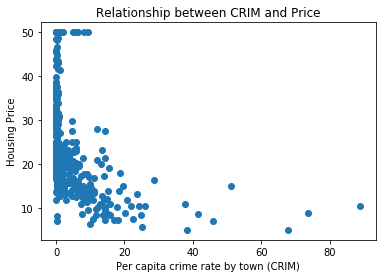

In [10]:
plt.scatter(bos.CRIM, bos.Price)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

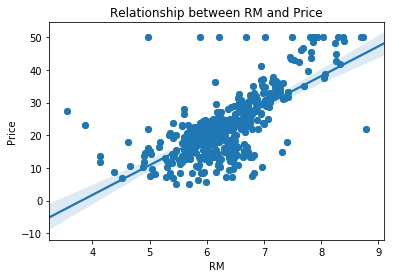

In [11]:
plt.scatter(bos.RM, bos.Price)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
sns.regplot(y="Price", x="RM", data=bos, fit_reg = True)

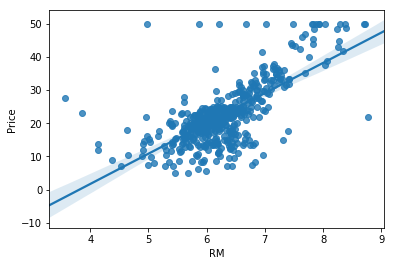

In [12]:

sns.regplot(y="Price", x="RM", data=bos, fit_reg = True)

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

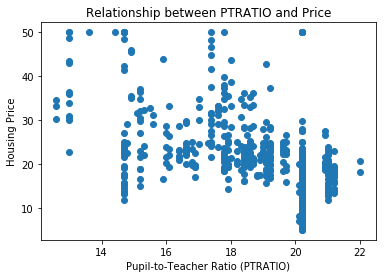

In [13]:
plt.scatter(bos.PTRATIO, bos.Price)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

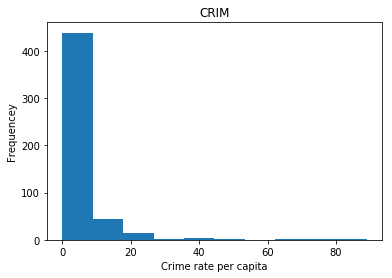

In [14]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

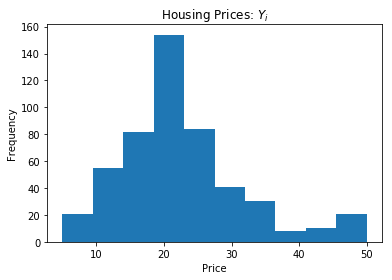

In [15]:
plt.hist(bos.Price)
plt.title('Housing Prices: $Y_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Linear regression with  Boston housing data example

#### Using  *statsmodel*

In [16]:
import statsmodels.api as sm

In [17]:
from statsmodels.formula.api import ols #ols means ordinary least squares

In [18]:
m =  ols('Price ~ RM', bos).fit()

In [19]:
type(m)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [20]:
type(ols)

method

In [51]:
#dir(m)

In [22]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           2.49e-74
Time:                        10:24:23   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Other way of using formula

ols('outcome ~ varibale1+variable2+ var3 + so on', data).fit()


Actual vs fitted values

Text(0.5, 1.0, 'Predicted vs Actual values')

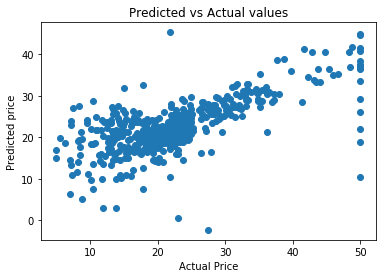

In [24]:
plt.scatter(bos['Price'], m.fittedvalues)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Predicted vs Actual values")

#### Fitting Linear Regression using `sklearn`

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
X = bos.drop('Price', axis =1)

In [27]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Functions of linear regression object
- lm.fit() fit a linear model 
- lm.predict() predict y with estimated coefficients
- lm.score() Returns coefficient of determination (R^2) measure of how well model actually predicts

In [29]:
lm.fit(X, bos.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
lm.intercept_

36.45948838509015

In [31]:
lm.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [32]:
pd.DataFrame(data = pd.concat([pd.Series(X.columns),pd.Series(lm.coef_)], axis =1) )

,0,1
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Predict prices

In [33]:
lm.predict(X)[:10]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211])

(array([  1.,   6.,  21.,  56., 116., 136.,  76.,  58.,  25.,  11.]),
 array([-4.28131071,  0.6141287 ,  5.50956811, 10.40500752, 15.30044693,
        20.19588634, 25.09132575, 29.98676516, 34.88220457, 39.77764398,
        44.67308339]),
 <a list of 10 Patch objects>)

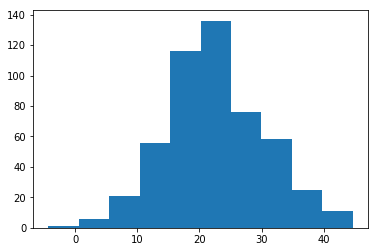

In [34]:
plt.hist(lm.predict(X))

Text(0.5, 1.0, 'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

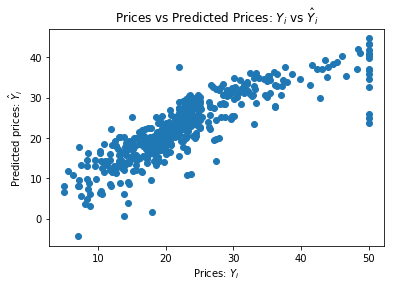

In [35]:
plt.scatter(bos.Price, lm.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

#### Residual sum of squares

In [36]:
np.sum ((lm.predict(X)-bos.Price)**2)

11078.784577954977

#### Mean squared error 

In [37]:
np.mean((lm.predict(X)-bos.Price)**2)

21.89483118172922

#### Model with just one feature 

In [38]:
lm = LinearRegression()

In [39]:
lm.fit (X[['PTRATIO']], bos.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

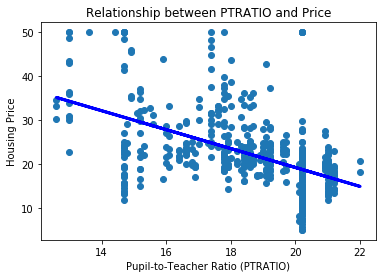

In [40]:
plt.scatter(bos.PTRATIO, bos.Price)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

plt.plot(bos.PTRATIO, lm.predict(X[['PTRATIO']]), color='blue', linewidth=3)
plt.show()

#### Model with just 3 features 

In [41]:
lm = LinearRegression()
lm.fit(X[['CRIM','RM', 'PTRATIO' ]], bos.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
lm.coef_

array([-0.20496083,  7.3804111 , -1.0695461 ])

In [53]:
lm.predict(X[['CRIM','RM', 'PTRATIO' ]])[:5]

array([28.79014801, 24.97539733, 30.61403551, 28.27026594, 29.36242923])

In [44]:
## using stats modles
mymodel = ols('Price ~ CRIM+RM+PTRATIO', bos ).fit()

In [45]:
mymodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sat, 06 Jul 2019   Prob (F-statistic):           6.15e-98
Time:                        10:24:24   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.404     -11.296       4.555
CRIM          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
RM             7.3804      0.402     18.382      0.000       6.592       8.169
PTRATIO       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
mymodel.fittedvalues[:5]

0    28.790148
1    24.975397
2    30.614036
3    28.270266
4    29.362429
dtype: float64

### Training/Test dataset

In [47]:
X_train = X[:-50]
X_test = X[-50:]
Y_train = bos.Price[:-50]
Y_test = bos.Price[-50:]

In [48]:
X.shape

(506, 13)

In [49]:
X_train.shape

(456, 13)

In [50]:
X_test.shape

(50, 13)

This way of separating training and test dataset is not random and it might be possible that train/test data are significantly different if data is ordered and we may get incorrect predictions for unseen data. To avoid this we can randomly separate training and test datas set. 

`Choosing randomly`

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
#train_test_split?

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, bos.Price, test_size =0.33, random_state =22 )

In [65]:
print(X_train.shape)

(339, 13)


In [66]:
type(X_train) ## returns df

pandas.core.frame.DataFrame

In [69]:
print(X_train.shape)
print (X_test.shape)
print(Y_train.shape)
print (Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


Constructing linear regression model on these datasets

In [72]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Residual plots 

Text(0.5, 1.0, 'Residual Plot using training (blue) and test (green) data')

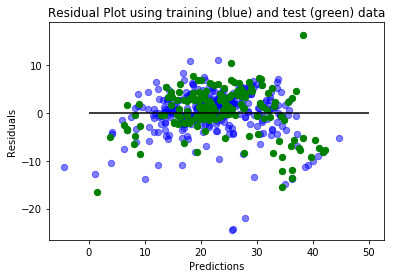

In [79]:
plt.scatter(lm.predict(X_train), lm.predict(X_train)-Y_train, c='b',alpha =0.5, s=40)
plt.scatter(lm.predict(X_test), lm.predict(X_test)- Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title('Residual Plot using training (blue) and test (green) data')

### Another example using : `Old Faithful Geyser Data Set`

In [80]:
faithful = sm.datasets.get_rdataset("faithful")

In [81]:
type(faithful)

statsmodels.datasets.utils.Dataset

In [86]:
faithful = faithful.data

In [87]:
faithful.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


(array([16., 28., 26., 24.,  9., 23., 62., 55., 23.,  6.]),
 array([43. , 48.3, 53.6, 58.9, 64.2, 69.5, 74.8, 80.1, 85.4, 90.7, 96. ]),
 <a list of 10 Patch objects>)

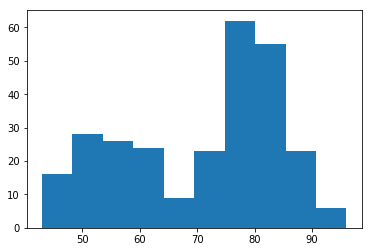

In [88]:
plt.hist(faithful.waiting)

Text(0, 0.5, 'Duration for eruptions')

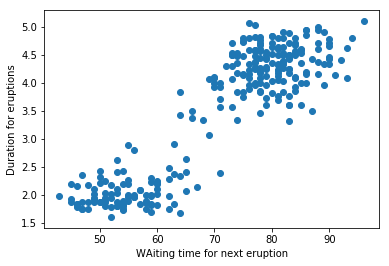

In [91]:
plt.scatter(faithful.waiting,faithful.eruptions)
plt.xlabel("WAiting time for next eruption")
plt.ylabel("Duration for eruptions")

#### Building linear regression model

In [106]:
model = ols('eruptions ~ waiting', faithful).fit()

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              eruptions   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Sat, 06 Jul 2019   Prob (F-statistic):          8.13e-100
Time:                        11:56:33   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
model.params

Intercept   -1.874016
waiting      0.075628
dtype: float64

`Plotting linear regression line`

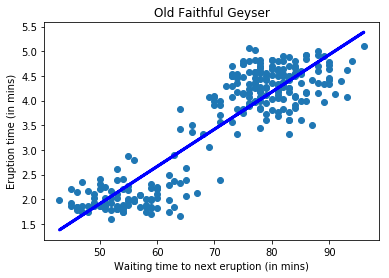

In [111]:
plt.scatter(faithful.waiting, faithful.eruptions)
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Eruption time (in mins)')
plt.title('Old Faithful Geyser')

plt.plot(faithful.waiting, model.fittedvalues, color='blue', linewidth=3)
plt.show()

The document takes inspiration from publicly availbable Havard's CS109 course(2015).
http://cs109.github.io/2015/pages/videos.html